In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
#from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
import pickle
from scipy.stats import randint
import random
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score 

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

In [3]:
credit_data = pd.read_csv('F:/iPRIMED/Python/creditcard.csv')
credit_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
credit_data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
credit_data = credit_data.drop(['Time'],axis=1)
credit_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


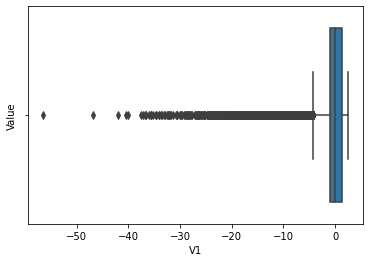

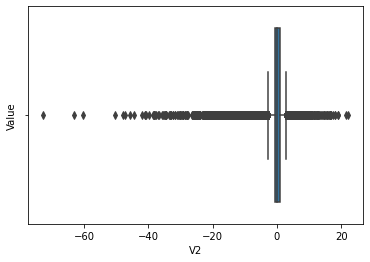

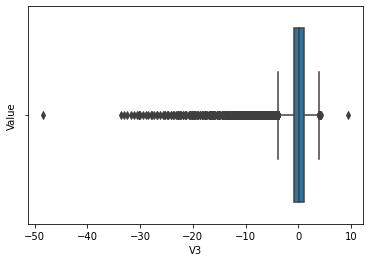

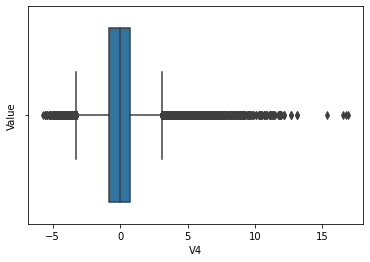

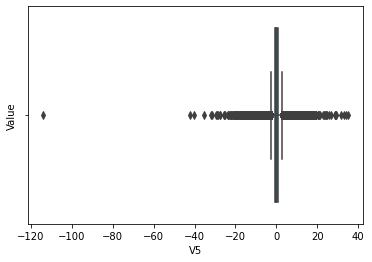

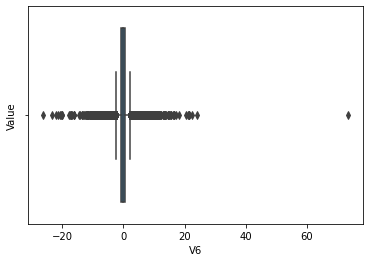

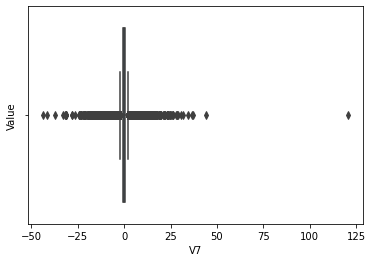

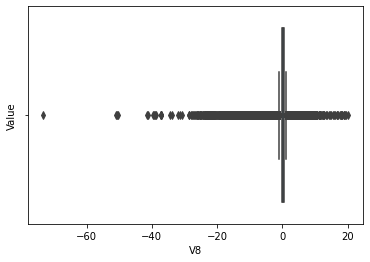

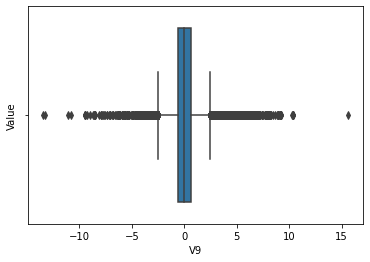

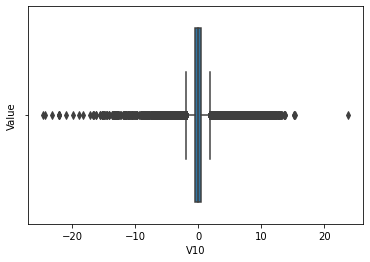

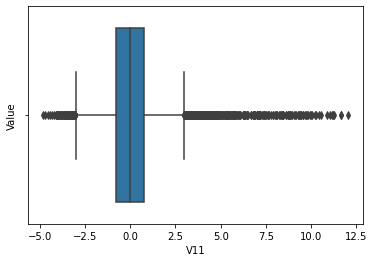

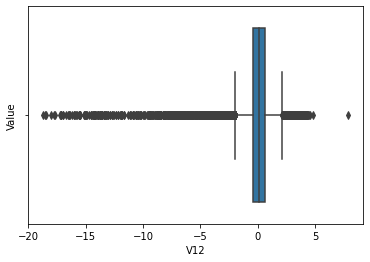

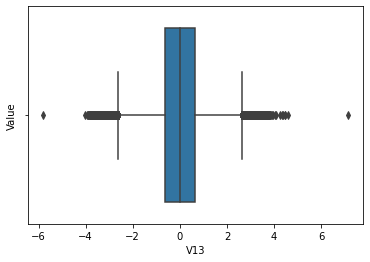

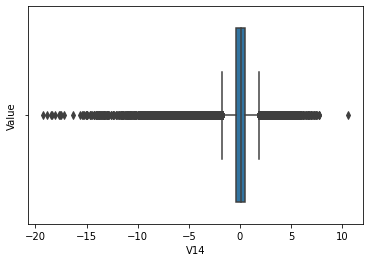

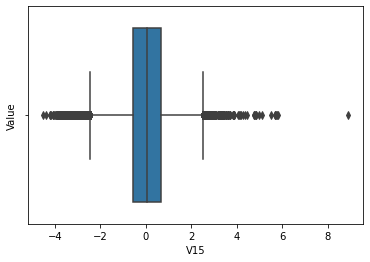

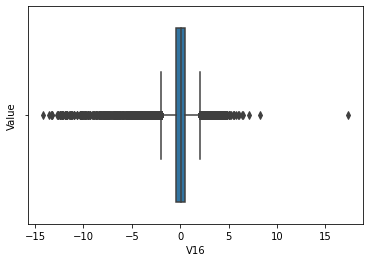

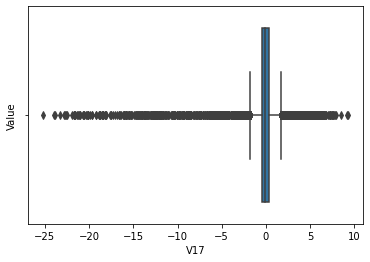

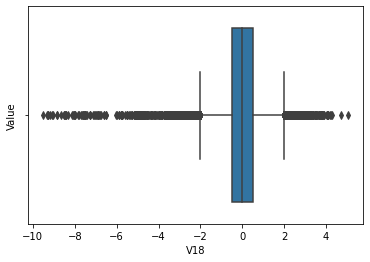

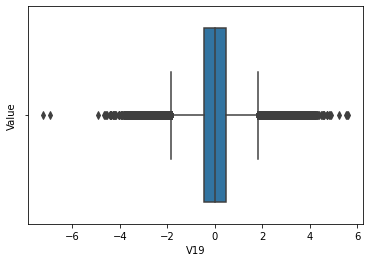

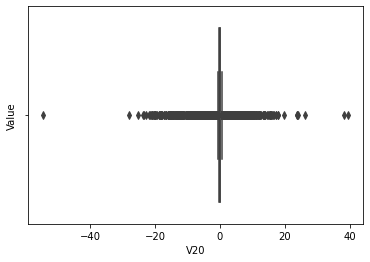

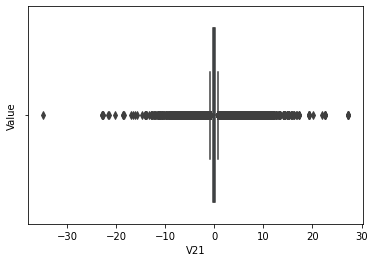

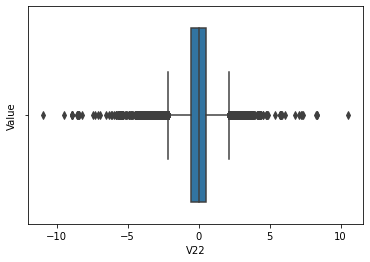

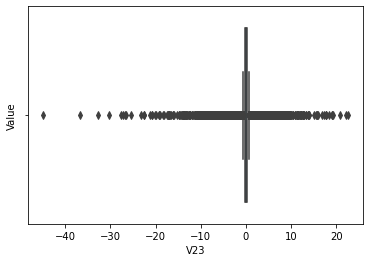

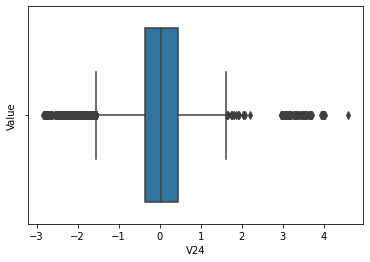

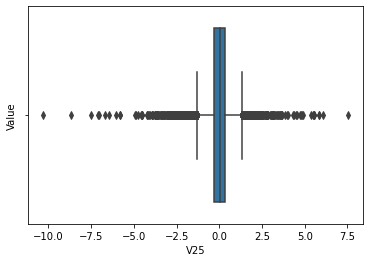

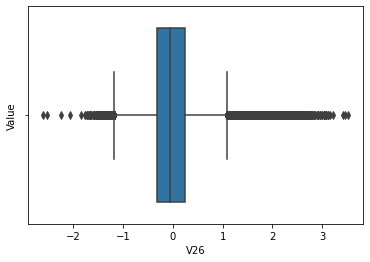

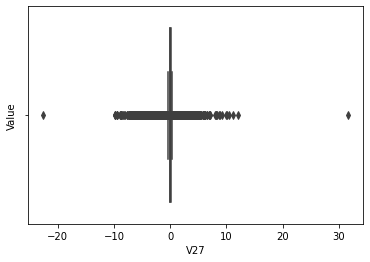

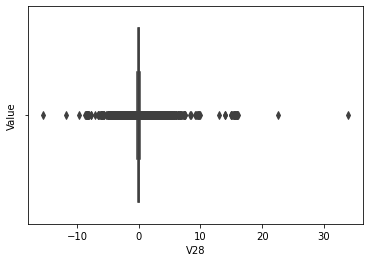

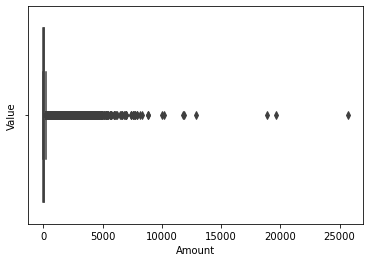

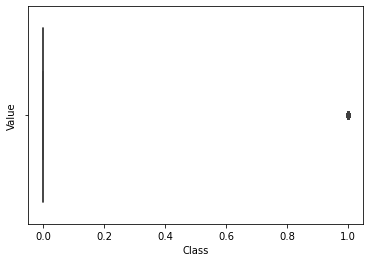

In [9]:
col_list = list(credit_data.columns)
for col in col_list:
    sns.boxplot(x=col, data=credit_data)
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.show()

In [10]:
credit_data.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,7.388135e-17,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,-3.991394e-16,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,1.156587e-15,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,2.232685e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,-5.202306e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,5.932243e-17,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,-7.492834e-17,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,-2.801370e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,-4.642274e-16,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733
V10,7.388135e-17,-3.991394e-16,1.156587e-15,2.232685e-16,-5.202306e-16,5.932243e-17,-7.492834e-17,-2.801370e-16,-4.642274e-16,1.000000e+00,...,1.177547e-15,-6.418202e-16,3.214491e-16,-1.355885e-16,-2.846052e-16,-3.028119e-16,-2.197977e-16,4.864782e-17,-0.101502,-0.216883


In [11]:
def IQR_range(feature):
    
    Q1 = credit_data[feature].quantile(0.25)
    Q3 = credit_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    Lower_boundary = Q1 - 1.5 * IQR
    Upper_boundary = Q3 + 1.5 * IQR
    return Lower_boundary,Upper_boundary

In [12]:
col_list = list(credit_data.columns)
col_list.remove('Class')
for feature in col_list:
    Lower_boundary,Upper_boundary = IQR_range(feature)
    credit_data.drop(credit_data[credit_data[feature] > Upper_boundary].index, inplace = True)
    credit_data.drop(credit_data[credit_data[feature] < Lower_boundary].index, inplace = True)   

In [13]:
X = credit_data.iloc[:,:-1]
Y = credit_data.iloc[:, -1]
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68
12,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,1.323729,...,-0.102756,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,121.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284794,-1.266580,-0.400461,0.956221,-0.723919,1.531993,-1.788600,0.314741,0.004704,0.013857,-0.815911,...,-0.029539,-0.157831,-0.883365,0.088485,-0.076790,-0.095833,0.132720,-0.028468,0.126494,0.89
284796,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,0.120908,...,-0.153997,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,60.00
284797,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,...,-0.139512,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49
284800,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,...,-0.256922,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68


In [14]:
'''
col_list = list(X.columns)
minmax = MinMaxScaler()
data_tf = minmax.fit_transform(X)
X = pd.DataFrame(data_tf, columns=col_list)
X
'''

'\ncol_list = list(X.columns)\nminmax = MinMaxScaler()\ndata_tf = minmax.fit_transform(X)\nX = pd.DataFrame(data_tf, columns=col_list)\nX\n'

In [15]:
'''
col_list = list(X.columns)
robustscaler = RobustScaler()
data_tf = robustscaler.fit_transform(X)
X = pd.DataFrame(data_tf, columns=col_list)
X
'''

'\ncol_list = list(X.columns)\nrobustscaler = RobustScaler()\ndata_tf = robustscaler.fit_transform(X)\nX = pd.DataFrame(data_tf, columns=col_list)\nX\n'

# Randomized Search

In [16]:
import random

param_dist = {"max_depth":randint(5,30),
              "max_features":[0.4, 0.6, 0.75],
              "min_samples_split":randint(2,11),
              "criterion":["gini", "entropy"]}

n_iter = 50
rf = RandomForestClassifier(n_estimators=200)
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=n_iter, cv =5, n_jobs= -1, verbose=1)
random_search.fit(X,Y)
print(random_search.best_params_)


# Using Hyperparameter tuning 

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size =0.2)
x_train.shape

(88097, 29)

In [18]:
pipelines = []
model_list = [KNeighborsClassifier(), RadiusNeighborsClassifier()]

for model in model_list:
    pipeline= make_pipeline(RandomOverSampler(), SimpleImputer(strategy='median'), RobustScaler(), model, verbose=True) 
    pipelines.append(pipeline)

In [2]:
def get_reports(y_test, y_pred):
    print("\nAccuracy:",accuracy_score(y_test, y_pred))
    print("Precision Score:",precision_score(y_test, y_pred, average = 'macro', zero_division=0))
    print("Recall Score:",recall_score(y_test, y_pred, average = 'macro', zero_division=0))
    print("f1 Score:",f1_score(y_test, y_pred, average = 'macro', zero_division=0))
    
    print("\n \nClassification Report:\n\n",classification_report(y_test, y_pred, zero_division=0))
    print("\n \nConfusion Matrix:\n")
    print(confusion_matrix(y_test, y_pred))

In [ ]:
param_list = [{'kneighborsclassifier__n_neighbors':list(range(2,15,1))},
              {'radiusneighborsclassifier__radius': np.linspace (1, 10, 18)}]

scoring = ['precision_macro', 'recall_macro', 'accuracy']

for pipeline, params in zip(pipelines, param_list):
    
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='recall_macro', n_jobs=-1,verbose=3)
    grid_search.fit(x_train, y_train)
    model = grid_search.best_estimator_
    print('\033[1m',"\n\nModel:",model[3],'\033[0m')
    with open(str(model[3])+'_model_credit_card.pickle', 'wb') as handle:
        pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

    y_pred = model.predict(x_test)
    
    print("\n \nConfusion Matrix:\n")
    print(confusion_matrix(Y, y_pred))
    
    print("\nCross Validate:\n")
    cv = cross_validate(model, X, Y, scoring=scoring, cv=5)
    print("\nCross Validation:",model[3],"\n")
    print("Mean Accuracy:",cv['test_accuracy'].mean())
    print("Mean Precision:",cv['test_precision_macro'].mean())
    print("Mean Recall:",cv['test_recall_macro'].mean())
    print("\n\n")
    

In [ ]:
model_list = ['RandomForestClassifier(max_depth=2, n_estimators=250)_model_credit_card', 'LogisticRegression(max_iter=5000)_model_credit_card', 'GaussianNB(var_smoothing=1.0)_model_credit_card', 'DecisionTreeClassifier(max_depth=5, min_samples_split=3)_model_credit_card']
scoring = ['precision_macro', 'recall_macro', 'accuracy']

for model in model_list:
    with open('C:/Users/DEVVRAK/'+str(model)+'.pickle', 'rb') as handle:
        model = pickle.load(handle)
    
    print('\033[1m',"\n\nModel:",model[3],'\033[0m')
    y_pred = model.predict(X)
    
    print("\n \nConfusion Matrix:\n")
    print(confusion_matrix(Y, y_pred))
    
    print("\nCross Validate:\n")
    cv = cross_validate(model, X, Y, scoring=scoring, cv=5)
    print("\nCross Validation:",model[3],"\n")
    scores = cross_val_score(model, X, Y, cv=5)
    print("Cross Validation Score:",scores.mean())
    print("Mean Accuracy:",cv['test_accuracy'].mean())
    print("Mean Precision:",cv['test_precision_macro'].mean())
    print("Mean Recall:",cv['test_recall_macro'].mean())
    print("\n\n")

In [ ]:
'''
{'logisticregression__max_iter':list(range(3000,7000,1000)), 'logisticregression__solver':['newton-cg', 'lbfgs', 'saga']},
{'decisiontreeclassifier__max_depth':[2,3,4,5,6,7,8], 'decisiontreeclassifier__min_samples_split':[2,3,4,5]},
{'randomforestclassifier__n_estimators':[10,50,100,200,250], 'randomforestclassifier__max_depth':[2,3,4,5,6,7,8], 'randomforestclassifier__min_samples_split':[2,3,4,5]},
{'svc__C':[1, 100], 'svc__gamma': [1,0.1], 'svc__kernel':['linear', 'poly', 'rbf'], 'svc__degree':[3,5,7]},
{'gaussiannb__var_smoothing': np.logspace(0,-9, num=10)},
'''

In [ ]:
'''
Projects Ideas:
1. Churn Prediction
2. Attrition Prediction
3. Fraud Detection
4. OCR (Optical Character recognition
5. Sales Prediction
6. House Pricing Prediction
7. Recommender System
8. Email Spam Filtering System
9. Music Genre Classifier
10. Human activity classifier
11. Sign language symbol recognizer
12. Customer Segmentation
13. Image Segmentation problem

'''